# **Lyra Graphtool Tutorial**

###### Welcome to the Off the Beaten Path Xeek Challenge!

###### This is a fun and unique variation of the traditional [travelling salesman](https://en.wikipedia.org/wiki/Travelling_salesman_problem) problem. 

###### In the traditional travelling salesman problem, the goal is to optimize the route that the "salesman" has to walk. This challenge introduces additional constraints and additional degrees of freedom (variables) to the problem. Not only will you be considering the distance to travel, but additional factors like simulation duration, budget, amount of rewards extracted from a particular site, and the cost of a worker. **The solution to the challenge is not only the plan, but also an algorithm that will be tested on other problem setups (different graphs to explore, different values of constraints), therefore you have to keep in mind, that you are developing a universal tool for finding a solution.**

###### The Xeek team has built a unique and powerful tool, called `lyra_graphtool`, to help you skip the graph setup part of the challenge and get to the important part; generating an algorithm to optimize the problem! This notebook, as well as a random walk exmaple solution and API Documentation will serve as your documenation and learning resources for the challenge.

###### Please use the links below if you would like to jump to a specific Object in this notebook, as well as a starter notebook with an example solution!

## **<u>Main Index</u>**

[Initial Setup](#initial-setup)

#### **<u>Parameters Module</u>**
[Parameters Object](#parameters-object)
* [display()](#display) - display the arguments passed through the `Parameters` object

[ProcessArgs Object](#processargs-object)
* [ProcessArgs.load()](#processargs.load) - load arguments file
* [load_graph()](#load_graph) - load graph file
* [ProcessArgs.save()](#processargs.save) - save process arguments as a `.json` file
* [ProcessArgs.values_to_args()](#processargs.values_to_args) - send arguments to a list

[Site_Structures Object](#site_structures-object)
* [Site_Structures.values_to_args()](#site_structures.values_to_args) - send arguments to a list

#### **<u>Configuration Module</u>**
[Configuration_Single_Time Object](#configuration_single_time)
* [Config_Single_Time.info()](#Config_Single_Time.info) - returns info about Vertex coordinates, type, and whether the site was accessed

[Configuration Object](#configuration-object)
* [add_sched()](#add_sched()) - add a schedule to configuration, given `Worker_Type` and number of workers
* [budget_feasible()](#budget_feasible) - tests whether the whole configuration can pass budget constraints
* [cost()](#cost()) - returns the cost of the whole configuration
* [cost_sched()](#cost_sched) - returns the cost of a single schedule
* [feasible()](#feasible) - tests whether the whole configuration is feasible in all terms
* [get_accessed_sites()](#get_accessed_sites) - returns summary dictionary of accessed sires and a string log of detailed accesses
* [get_current_workers()](#get_current_workers) - returns a dictionary of workers that are active in configuration
* [get_max_revenue()](#get_max_revenue) - returns maximum reward available in current setup
* [get_schedule_path_length()](#get_schedule_path_length) - returns path length (i.e. how many timesteps has the worker been active?)
* [get_vertices_start()](#get_vertices_start) - returns the vertices of Vertex_Type.ORIGIN
* [get_worker()](#get_worker) - returns Worker object of specific type, making sure it has proper cost_rate assigned
* [is_empty()](#is_empty) - returns whether the the schedule is empty
* [load_from_json()](#load_from_json) - loads solution from `.json` file
* [revenue()](#revenue) - returns the revenue of the whole configuration
* [save()](#save) - save configuration to pickle format
* [save_to_json()](#save_to_json) - saves the solution to a `.json` file
* [sched_all_feasible_access_sites()](#sched_all_feasible_access_sites) - tests whether the whole configuration can pass access constraints
* [sched_all_feasible_space()](#sched_all_feasible_space) - tests whether the whole configuration is spatially feasible
* [sched_feasible_access_sites()](#sched_feasible_access_sites) - tests whether a single schedule can pass access contraints (i.e. one site can be accessed by one worker as a time and once the reward is extracted is doesn't contain more reward)
* [sched_feasible_space()](#sched_feasible_space) - tests whether a single schedule is spatially feasible  
* [sched_info()](#sched_info) - prints info about specific workers schedule
* [sched_revenue()](#sched_revenue) - returns revenue of a single schedule
* [site_accessed()](#site_accessed) - determine whether a site has been accessed at any given time in a schedule, given Vertex information 
* [site_accessed_at_time()](#site_accessed_at_time) - determine whether a site has been accessed at a particular time step, given Vertex and timestep information

#### **<u>Edge Module</u>**
[Edge Object](#edge-Object)
* [in_graph()](#in_graph)
* [Edge.info()](#Edge.info) - returns coordinates of vertices connected by this edge
* [nearest_neighbor()](#nearest_neighbor)

#### **<u>Graph Module</u>**
[Graph Object](#graph-Object)
* [add_vertex()](#add_vertex)
* [adjacent_vertices()](#adjacent_vertices) - returns a list of adjacent vertices to a given vertex
* [closest_vertices()](#closest_vertices)
* [connected_components()](#closest_components)
* [depth_first_search()](#depth_first_search)
* [distance()](#distance)
* [edges_info()](#edges_info) - returns edges in a graph
* [get_edges_at_vertex()](#get_edges_at_vertex) - returns a list of edges for a given vertex
* [get_vertex_xy()](#get_vertex_xy) - returns a vertex object of given coordinates
* [get_vertices_type()](#get_vertices_type) - returns a list of vertices of a given type
* [isolated_vertices()](#isolated_vertices)
* [load_from_json()](#load_from_json) - loads graph from a json file
* [make_graph_connected()](#make_graph_connected)
* [paths()](#paths)
* [print_graph()](#print_graph) - display graph with paths
* [Graph.save()](#Graph.save) - save graph as pickle file
* [Graph.save_to_json()](#Graph.save_to_json) - saves graph to a json file
* [set_edges()](#set_edges)
* [set_random_sites_origin()](#set_random_sites_origin)
* [set_vertex_coords()](#set_vertex_coords) - manually changing Vertex coordinates for a given Vertex
* [set_vertex_type()](#set_vertex_type) - setting a type of a particular Vertex manually, based on either the Vertex object passed to method or Vertex coordinates (both coordinates to be provided)
* [vertices_array()](#vertices_array) - returns a numpy array of the graph vertices
* [vertices_info()](#vertices_info) - returns coordinates and types of vertices in a graph

[Graph_Type Object](#graph_type-object)

#### **<u>Vertex Module</u>**
[Vertex Object](#vertex-Object)
* [accessible_types()](#accessible_types) - returns which types of vertices are accessible
* [Vertex.info()](#vertex.info) - returns coordniates and type of Vertex

[Vertex_Type Object](#vertex_type-object)

#### **<u>Worker Module</u>**
[Worker Object](#worker-Object)
* [access()](#access) - determine whether Worker has access to given Vertex

[Worker_Type Object](#worker_type-object)

## **Initial Setup**

###### Upon starting this challenge, competitors will need to download the required matrials from the [Off the Beaten Path](https://xeek.ai/challenges/off-the-beaten-path) challenge page. 
###### The Xeek team will provide:
* An arguments file that will contain information to set up the problem. All participants will recieve the same arguments file. This file will contain information like **total budget**, **site rewards**, and **duration** of the simulation.
* A graph JSON file. All participants will recieve the same `graph.json` file. This will be loaded into the `lyra_graphtool.Graph` object to set up the graph vertices and site information.
* A starter notebook, similar to the [example solution](Lyra-starter-v0.ipynb), but without the example solution. This notebook will be your playground to write an algorithm to solve the Off the Beaten Path Challenge!
###### Note: Ensure that the `lyra_graphtool` folder is saved in your project folder to avoid import issues


###### **Now let's get started!**
###### Run the next 3 code cells in order to setup graphs, budgets, worker costs, rewards, and duration. Double check to make sure the file paths for the `lgtool.ProcessArgs.load()` are correct.

In [1]:
import random
from copy import deepcopy
from random import randint
import pprint as pp

import lyra_graphtool as lgtool
from lyra_graphtool import Configuration, Config_Single_Time, Edge, Graph, Graph_Type, Parameters, Vertex, Worker_Type, Vertex_Type

In [2]:
pargs = lgtool.ProcessArgs.load(arguments_file='../lyra-challenge/ready_setups/args_random', graph_file='../lyra-challenge/ready_setups/graph_random.json')

In [3]:
params = lgtool.Parameters(pargs.graph, 
                           budget = pargs.args_trial.budget, 
                           duration_time = pargs.args_trial.duration,
                           cost_rate = pargs.worker_cost_rate
                           )

cfg = lgtool.Configuration(params)

In [8]:
cfg.load_from_json('./solutions/solution_random.json')

## **ProcessArgs Object**

#### The ProcessArgs object will be used in the intial setup of the problem. Xeek will provide the setup parameters for the graph and arguments file for the challenge. Challengers do, however, have the tools to create their own argument files. Remember, the final scoring will occur on a different argument file than what is provided, so it is to your advantage to create your own argument file(s) and test your algorithm to see if it is effiecient for all scenarios. Below will explore the functionality of the ProceesArgs object, by building a test arguments/graph file.

In [53]:
duration = 50 # amount of timesteps in problem
duration = str(int(duration))
arg_list_new = [
    '--trial_name', 'trial1',    # name of trial
    '--budget', '10000',          # budget that will be used by hiring workers of different types
    '--duration', duration,      # amount of timesteps in problem
    '--worker1_cost', '200',     # Worker_Type.WORKER1 cost/timestep which reduces our budget
    '--worker2_cost', '400',     # Worker_Type.WORKER2 cost/timestep which reduces our budget
    '--worker3_cost', '600',     # Worker_Type.WORKER3 cost/timestep which reduces our budget
    ################## BELOW GRAPH ARGUMENTS ####################
    '--filename_graph', '',      # if loading graph, max_x, max_y, num_verts, graph_type, num_site[k] (k=1,2,3) ignored
    '--max_x', '10',             # max x coordinate during random or grid graph creation
    '--max_y', '10',             # max y coordinate during random or grid graph creation
    '--num_verts', '30',         # amount of vertices (travel points) that the graph will have
    '--graph_type', 'grid',    # type of graph, either 'random' or 'grid' the difference between these is shown further in notebook
    '--num_site1', '3',          # amount of Vertex_Type.SITE1 on the graph mind that amount of all sites cannot be greater than 'num_verts-1'
    '--num_site2', '2',          # amount of Vertex_Type.SITE2 on the graph mind that amount of all sites cannot be greater than 'num_verts-1'
    '--num_site3', '5',          # amount of Vertex_Type.SITE3 on the graph mind that amount of all sites cannot be greater than 'num_verts-1'
    '--site1_acquire_time', '2',    # if args starting with 'site' are specified, they are imposed on loaded graph
    '--site2_acquire_time', '4',    # timesteps needed to extract Vertex_Type.SITE2 reward
    '--site3_acquire_time', '6',    # timesteps needed to extract Vertex_Type.SITE3 reward
    '--site1_reward', '100',     # reward from extracting Vertex_Type.SITE1
    '--site2_reward', '200',     # reward from extracting Vertex_Type.SITE2
    '--site3_reward', '300',     # reward from extracting Vertex_Type.SITE3
]

##### Create a `ProcessArgs` object and pass the new argument file through it

In [54]:
new_pargs = lgtool.ProcessArgs(arg_list_new)

### **ProcessArgs.save()**

##### Save the new arguments file for future use

In [55]:
new_pargs.save(f'ready_setups/args_{new_pargs.args_trial.trial_name}')

### **ProcessArgs.load()**

#### Load the new argument and graph files into ProcessArgs() using load()

In [ ]:
new_pargs_from_load = lgtool.ProcessArgs.load(arguments_file='../lyra-challenge/ready_setups/args_args_trial1'
                                            ,graph_file='../lyra-challenge/ready_setups/graph_trial1.json')

### **load_graph()**

##### Loading graph from filename into Site_Structures

In [69]:
# code here, need to figure out how to use this

### **ProcessArgs.values_to_args()**

#### Finally, return the new arguments into a list and compare to what was created at the top, using values_to_args()

In [68]:
new_pargs_list = new_pargs.values_to_args() 
pp.pprint(new_pargs_list)

['--trial_name',
 'trial1',
 '--max_x',
 '10',
 '--max_y',
 '10',
 '--num_verts',
 '30',
 '--graph_type',
 'grid',
 '--num_site1',
 '3',
 '--num_site2',
 '2',
 '--num_site3',
 '5',
 '--site1_acquire_time',
 '2',
 '--site2_acquire_time',
 '4',
 '--site3_acquire_time',
 '6',
 '--site1_reward',
 '100.0',
 '--site2_reward',
 '200.0',
 '--site3_reward',
 '300.0',
 '--site1_mult_time',
 '1',
 '--site2_mult_time',
 '1',
 '--site3_mult_time',
 '1',
 '--site1_mult_time_active',
 '0, 50',
 '--site2_mult_time_active',
 '0, 50',
 '--site3_mult_time_active',
 '0, 50',
 '--site1_mult_workers',
 '1, 1, 1',
 '--site2_mult_workers',
 '1, 1, 1',
 '--site3_mult_workers',
 '1, 1, 1',
 '--site1_exp_time',
 '50',
 '--site2_exp_time',
 '50',
 '--site3_exp_time',
 '50',
 '--worker1_cost',
 '200.0',
 '--worker2_cost',
 '400.0',
 '--worker3_cost',
 '600.0',
 '--budget',
 '10000.0',
 '--duration',
 '50']


[Back to the Top!](#lyra-graphtool-tutorial)

-----------------------

## **Parameters Object**

##### The loaded arguments and graph can be wrapped with `lgtool.Parameters` class which can be further passed to the `lgtool.Configuration()` object.

In [38]:
params = lgtool.Parameters(graph = pargs.graph
                           ,budget = pargs.args_trial.budget
                           ,duration_time = pargs.args_trial.duration
                           ,cost_rate = pargs.worker_cost_rate)

### **display()**

##### Use the `display()` function to view the check the arguments that were passed through `lgtool.Parameters`

In [42]:
params.display()

{'budget': 1000.0, 'duration_time': 20, 'graph': <lyra_graphtool.graph.Graph object at 0x11842faf0>, 'worker_cost_rate': {<Worker_Type.WORKER1: 0>: 100.0, <Worker_Type.WORKER2: 1>: 200.0, <Worker_Type.WORKER3: 2>: 500.0}}


##### Or call each individual argument passed through `lgtools.Parameters()` object

In [45]:
print(params.budget)
print(params.duration_time)
print(params.graph)
print(params.worker_cost_rate)

1000.0
20
{<Worker_Type.WORKER1: 0>: 100.0, <Worker_Type.WORKER2: 1>: 200.0, <Worker_Type.WORKER3: 2>: 500.0}


[Back to the Top!](#lyra-graphtool-tutorial)

-----------------------

## **Configuration Object**

##### The `lgtool.Configuration()` object contains not only the graph to be optimized, but also problem constraints and setup like budget, duration, and worker cost rates. Pass the arguments run through the `lgtool.Parameters()` section for set up. This module will be the workhorse to solve the challenge because it allows users to add, update, and extract most parameters for the challenge.

In [ ]:
params = lgtool.Parameters(pargs.graph, 
                           budget = pargs.args_trial.budget, 
                           duration_time = pargs.args_trial.duration,
                           cost_rate = pargs.worker_cost_rate
                           )

cfg = lgtool.Configuration(params)

### **add_sched()**

##### Add a specific schedule for a Worker_Type (wt) and number of those worker (wn). To access the configuration dictionary, call `.config` on the Configuration object created in the intial setup. Users can access this information using this format: `Configuration.config[Worker_Type][worker number]`

##### In the example below, `.config` is called on the Configuration object. We define that we want a `Worker_Type = WORKER1` and we want 1 of those workers.

In [125]:
schedule_add = cfg.config[0][1]
print(schedule_add)
cfg.add_sched(wt = Worker_Type.WORKER1, wn=2, sched=schedule_add)

{0: <lyra_graphtool.configuration.Config_Single_Time object at 0x11f3a9b40>, 1: <lyra_graphtool.configuration.Config_Single_Time object at 0x11f262d40>, 2: <lyra_graphtool.configuration.Config_Single_Time object at 0x11f262da0>, 3: <lyra_graphtool.configuration.Config_Single_Time object at 0x11f262e00>, 4: <lyra_graphtool.configuration.Config_Single_Time object at 0x11f262e60>, 5: <lyra_graphtool.configuration.Config_Single_Time object at 0x11f262ec0>, 6: <lyra_graphtool.configuration.Config_Single_Time object at 0x11f262f20>, 7: <lyra_graphtool.configuration.Config_Single_Time object at 0x11f262f80>, 8: <lyra_graphtool.configuration.Config_Single_Time object at 0x11f262fe0>, 9: <lyra_graphtool.configuration.Config_Single_Time object at 0x11f263040>, 10: <lyra_graphtool.configuration.Config_Single_Time object at 0x11f2630a0>, 11: <lyra_graphtool.configuration.Config_Single_Time object at 0x11f263100>, 12: <lyra_graphtool.configuration.Config_Single_Time object at 0x11f263160>, 13: <lyr

### **budget_feasible()**

##### Here we test whether the entire solution configuration stays within the budget contraints set in the arguments. This can be called on the `Configuration` object with no input arugments.

In [126]:
cfg.budget_feasible()

True

### **cost()**

##### This will return the cost of the entire configuration. Remember, profit will be used to score the solution(`profit = revenue - cost`), so its important to not only increase revenue, but also be mindful of costs.  It can be called on the `Configuration` object with no input arguments.

In [127]:
cfg.cost()

900.0

### **cost_sched()**

##### Users can calculate the cost of a single-worker schedule by inputting. 

In [256]:
schedule = cfg.config
cfg.cost_sched(sched = schedule[0][1],worker=Worker_Type.WORKER1)

0

### **feasible()**

##### Method to determine overall feasibility of the configuration in terms of space, buget, and access

In [212]:
cfg.feasible()

True

### **get_accessed_sites()**

##### Method to return the sites that were accessed in a schedule

In [213]:
schedule = cfg.config
cfg.get_accessed_sites(schedule)

({(3.0, 0.0): 0,
  (3.0, 2.0): 0,
  (3.0, 4.0): 0,
  (2.0, 5.0): 0,
  (4.0, 6.0): 0,
  (1.0, 2.0): 0,
  (1.0, 3.0): 0,
  (7.0, 0.0): 0,
  (7.0, 3.0): 0,
  (5.0, 6.0): 0},
 'Log of accesses:\n')

### **get_current_workers()**

##### Method to return a dictionary of the the workers used in the configuration. This requires the full configuration schedule as an input.

In [214]:
cfg.get_current_workers(schedule)

{<Worker_Type.WORKER1: 0>: 1,
 <Worker_Type.WORKER2: 1>: 0,
 <Worker_Type.WORKER3: 2>: 0}

### **get_max_revenue()**

##### Get the maximum revenue earned for a particular graph configuration

In [165]:
cfg.get_max_revenue()

2200.0

### **get_sched_path_length()**

##### This is used to determine the length of one worker schedule (how many steps was the worker active). It requires a single schedule as an input

In [30]:
cfg.get_sched_path_length(schedule[0][9])

0

### **get_vertices_start()**

##### Returns the list vertices from which a worker's path must start

In [216]:
start = cfg.get_vertices_start()
print(start)

### **get_worker()**

##### Method to return a Worker object. The worker object has rates compliant with the configuration

In [28]:
cfg.get_worker(Worker_Type.WORKER1)


### **is_empty()**

##### Determine if a single worker schedule is empty

In [235]:
schedule = cfg.config
cfg.is_empty(schedule[0][1])

True

### **load_from_json()**

##### Loading the configuration from a `.json `

In [245]:
cfg.load_from_json(file_name='./solutions/solution_random.json')

### **revenue()**

##### This is a method to calculate the revenue for the entire schedule configuration

In [247]:
cfg.revenue()

0

### **save()**

##### Save the configuration solution as a pickle file

In [249]:
cfg.save(file_name='./ready_setups/test_config_save')

### **save_to_json()**

##### Save the configuration solution as a `.json` file

In [250]:
cfg.save_to_json('./ready_setups/test_config_save.json')

### **sched_all_feasible_access_sites()**

##### This method determines if a schedules's access properties are feasible

In [251]:
cfg.sched_all_feasible_access_sites()

True

### **sched_all_feasible_space()**

##### This is a method to determine if all schedules are spatially feasible

In [253]:
cfg.sched_all_feasible_space()

True

### **sched_feasible_access_sites()**

##### This method determines if a single schedule's access/extract properties are feasible. It requires the input of a single schedule and the Worker_Type class to test.

In [255]:
schedule = cfg.config
cfg.sched_feasible_access_sites(sched= schedule[0][1], worker_type= Worker_Type.WORKER1)

True

### **sched_feasible_space()**

##### This tests whether the whole configuration is spatially feasible and requires an input of a single schedule.

In [25]:
schedule = cfg.config
cfg.sched_feasible_space(sched=schedule[0][1])

True

### **sched_info()**

##### Prints information about specific workers schedule in the form: `[timestep, (x_coordinate, y_coordinate), Vertex_Type, accessed/not accessed]`

In [232]:
schedule = cfg.config
cfg.sched_info(schedule[0][2])

['[t=0, (None,None), vtype=None, acc=False ]',
 '[t=1, (None,None), vtype=None, acc=False ]',
 '[t=2, (None,None), vtype=None, acc=False ]',
 '[t=3, (None,None), vtype=None, acc=False ]',
 '[t=4, (None,None), vtype=None, acc=False ]',
 '[t=5, (None,None), vtype=None, acc=False ]',
 '[t=6, (None,None), vtype=None, acc=False ]',
 '[t=7, (None,None), vtype=None, acc=False ]',
 '[t=8, (None,None), vtype=None, acc=False ]',
 '[t=9, (None,None), vtype=None, acc=False ]',
 '[t=10, (None,None), vtype=None, acc=False ]',
 '[t=11, (None,None), vtype=None, acc=False ]',
 '[t=12, (None,None), vtype=None, acc=False ]',
 '[t=13, (None,None), vtype=None, acc=False ]',
 '[t=14, (None,None), vtype=None, acc=False ]',
 '[t=15, (None,None), vtype=None, acc=False ]',
 '[t=16, (None,None), vtype=None, acc=False ]',
 '[t=17, (None,None), vtype=None, acc=False ]',
 '[t=18, (None,None), vtype=None, acc=False ]',
 '[t=19, (None,None), vtype=None, acc=False ]']

### **sched_revenue()**

##### This method requires a single schedule as an input and returns the revenue of that particular schedule

In [234]:
cfg.sched_revenue(schedule[0][2])

0

### **site_accessed()**

##### This method determines whether or not the site was accessed in the configuration. It reuqired a Vertex object as an input.

In [187]:
v_orig = cfg.graph.get_vertices_type(lgtool.Vertex_Type.ORIGIN)[0]
cfg.site_accessed(v=v_orig)

False

### **site_accessed_at_time()**

##### This method requires a Vertex as an input and returns whether of not that site was accessed at a given time. This example uses timestep=5. You can see that this site was not accessed at timestep=5.

In [188]:
v_orig = cfg.graph.get_vertices_type(lgtool.Vertex_Type.SITE1)[0]
cfg.site_accessed_at_time(v=v_orig, t=5)

False

[Back to the Top!](#lyra-graphtool-tutorial)

-----------------------

## **Edge Object**

### **Edge.info()**

##### `Edge.info()` returns the edge information about a given Edge object

In [17]:
verts = pargs.graph.vertices
v1 = verts[0]
v2 = verts[-1]

edge_obj = lgtool.Edge(v1=v1,v2=v2)
edge_obj.info()

[(3.0, 0.0), (5.0, 0.0)]

### **in_graph()**

##### This method determines if the edge is allowed to travel in 1 timestep

In [13]:
verts = pargs.graph.vertices
v1 = verts[0]
v2 = verts[-1]

edge_obj = lgtool.Edge(v1=v1,v2=v2)
edge_obj.in_graph()

False

### **nearest_neighbor()**

##### This method requires an input of two vertices on the graph and determines if they are near each other.

In [16]:
verts = pargs.graph.vertices
v1 = verts[0]
v2 = verts[-1]

edge_obj = lgtool.Edge(v1=v1,v2=v2)
edge_obj.nearest_neighbor()

False

[Back to the Top!](#lyra-graphtool-tutorial)

-----------------------

## **Graph Object**

### **add_vertex()**

##### `add_vertex()` allows users to manually add a vertex to the graph configuration

In [22]:
verts = lgtool.Vertex(1, 1, Vertex_Type.SITE3, reward=1000)

print(verts)
cfg.graph.add_vertex(v=verts)

after translations in x and y, no reduction in components
components:
{(9, 7): (<Vertex_Type.SITE3: 4>, 1)}


### **adjacent_vertices()**

##### This method returns which vertices are adjacent to a given vertex

In [39]:
cfg.graph.adjacent_vertices(v=verts)

### **closest_vertices()**

##### `closest_vertices()` returns a list the closet vertices to a given vertex

In [24]:
closest_verts_list = cfg.graph.closest_vertices(v=verts)
pp.pprint(closest_verts_list)

### **connected_components()**

##### `connected_components()` returns a list of vertices that are connected

In [41]:
cfg.graph.connected_components()

[[<lyra_graphtool.vertex.Vertex at 0x10b57b670>,

### **depth_first_search()**

In [20]:
# unclear what this function returns?

### **distance()**

### **get_edges_at_vertex()**

##### The `get_edges_at_vertex()` method will return a list of edges at a given vertex. Here we define our vertex using [get_vertex_xy()](#get_vertex_xy) with coordinates (x=2,y=3)

In [18]:
verts = cfg.graph.get_vertex_xy(x=2,y=3)
vert_edges = cfg.graph.get_edges_at_vertex(v=verts)
pp.pprint(vert_edges)

### **edges_info()**

##### This method will return the edges for the entire graph

In [22]:
edge_list = cfg.graph.edges_info()
pp.pprint(edge_list)

{((0.0, 7.0), (0.0, 6.0)): 1,
 ((0.0, 8.0), (0.0, 7.0)): 1,
 ((1.0, 2.0), (1.0, 3.0)): 1,
 ((1.0, 5.0), (0.0, 6.0)): 1,
 ((1.0, 7.0), (0.0, 6.0)): 1,
 ((1.0, 7.0), (0.0, 7.0)): 1,
 ((1.0, 7.0), (0.0, 8.0)): 1,
 ((2.0, 0.0), (1.0, 0.0)): 1,
 ((2.0, 0.0), (2.0, 1.0)): 1,
 ((2.0, 1.0), (1.0, 0.0)): 1,
 ((2.0, 1.0), (1.0, 2.0)): 1,
 ((2.0, 3.0), (1.0, 2.0)): 1,
 ((2.0, 3.0), (1.0, 3.0)): 1,
 ((2.0, 5.0), (1.0, 5.0)): 1,
 ((2.0, 8.0), (1.0, 7.0)): 1,
 ((3.0, 0.0), (2.0, 0.0)): 1,
 ((3.0, 0.0), (2.0, 1.0)): 1,
 ((3.0, 0.0), (4.0, 1.0)): 1,
 ((3.0, 2.0), (2.0, 1.0)): 1,
 ((3.0, 2.0), (2.0, 3.0)): 1,
 ((3.0, 2.0), (4.0, 1.0)): 1,
 ((3.0, 4.0), (2.0, 3.0)): 1,
 ((3.0, 4.0), (2.0, 5.0)): 1,
 ((3.0, 6.0), (2.0, 5.0)): 1,
 ((3.0, 6.0), (3.0, 7.0)): 1,
 ((3.0, 6.0), (4.0, 6.0)): 1,
 ((3.0, 7.0), (2.0, 8.0)): 1,
 ((3.0, 7.0), (4.0, 6.0)): 1,
 ((4.0, 1.0), (5.0, 0.0)): 1,
 ((4.0, 1.0), (5.0, 2.0)): 1,
 ((4.0, 6.0), (5.0, 6.0)): 1,
 ((4.0, 6.0), (5.0, 7.0)): 1,
 ((5.0, 6.0), (5.0, 7.0)): 1,
 ((6.0, 0.

### **get_vertex_xy()**

##### This method returns the vertex object at given (x,y) coordinates

In [16]:
specified_verts = cfg.graph.get_vertex_xy(x=3,y=4)
print(specified_verts.info())

[(3.0, 4.0), <Vertex_Type.SITE1: 2>]


### **get_vertices_type()**

##### We can use this method to extract vertices of a specific Vertex_Type

In [46]:
site1_vert_list = cfg.graph.get_vertices_type(v_type=Vertex_Type.SITE1)
pp.pprint(site1_vert_list)

### **isolated_vertices()**


##### Using `isolated_vertices()`, users can determine if any of the vertices in the graph are isolated from other vertices in the graph configuration.

In [12]:
isolated_verts_list = cfg.graph.isolated_vertices()
pp.pprint(isolated_verts_list)

### **load_from_json()**


##### Load `.json` graph files into the Configuration object

In [24]:
cfg.graph.load_from_json(file_name='./ready_setups/graph_sample.json')

### **make_graph_connected()**


### **paths()**


##### Another import method for the challenge is `paths()`, When provided with two vertices, this method will return ever possible path that can connect the two points.

In [ ]:
# get two verts and then get paths between them
verts = pargs.graph.vertices

# pick first and last vertex in the list
v1 = verts[0]
v2 = verts[-1]

print(v1.info(),v2.info())
print('\n')
paths12 = pargs.graph.paths(v1,v2)

print('\n')
for p in paths12:
    path = []
    for v in p:
        path.append((v.x,v.y))
        
    display(path)
    # print_graph() method when provided with a list of vertices, highlights them in orange
    pargs.graph.print_graph(p)

### **print_graph()**


##### The `print_graph()` method will be one of the most important used during the challenge, because it will allow you to visualize your the solution that your algorithm has created.

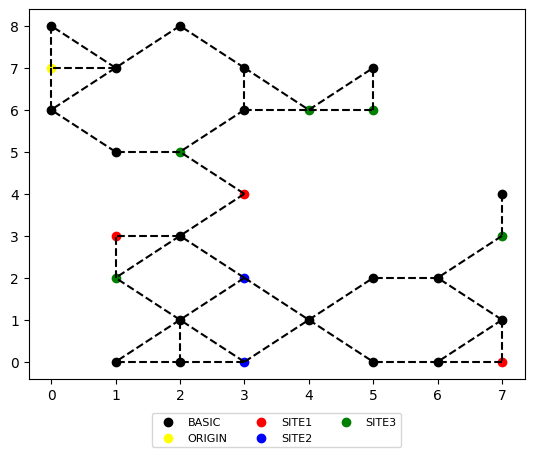

In [12]:
pargs.graph.print_graph()

### **Graph.save()**


##### Save the graph to a pickle file for future use

In [11]:
pargs.graph.save(file_name= './ready_setups/test_graph_save')

### **Graph.save_to_json()**


##### Save the new graph to a `.json` file for later use

In [70]:
new_pargs.graph.save_to_json(f'ready_setups/graph_{new_pargs.args_trial.trial_name}.json')

### **set_edges()**


##### unclear what this does?

In [9]:
cfg.graph.set_edges()

### **set_random_sites_origin()**

##### unclear what this does?

In [6]:
cfg.graph.set_random_sites_origin(n_site1=3,n_site2=4,n_site3=5)

### **set_vertex_type()**

##### We can use the `set_vertex_type()` method to manually set a particular Vertex object, by defining the `Vertex_Type` and (x,y) coordinates

In [28]:
set_verts = cfg.graph.set_vertex_type(v_type= Vertex_Type.SITE2, x=5, y=6)
print(set_verts.info())

[(5.0, 6.0), <Vertex_Type.SITE2: 3>]


### **set_vertex_coords()**

##### Similar to `set_vertex_type()`, `set_vertex_coords()` will set a defined Vertex_Type to specificed (x,y) coordinates

In [5]:
input_vertex = lgtool.Vertex(x=1,y=2,v_type=Vertex_Type.BASIC)
print(f'Coordinates of Input Vertex:{input_vertex.info()}')
new_vertex = cfg.graph.set_vertex_coords(v=input_vertex, x=9,y=7)
print(f'Coordinates of New Vertex:{new_vertex.info()}')

Coordinates of Input Vertex:[(1, 2), <Vertex_Type.BASIC: 0>]
Coordinates of New Vertex:[(9, 7), <Vertex_Type.SITE3: 4>]


### **vertices_array()**

##### We can use the `vertices_array()` method to extract a Numpy array of vertices in the graph

In [50]:
vert_array = cfg.graph.vertices_array()
print(vert_array)

[[3. 0.]
 [3. 2.]
 [3. 6.]
 [3. 4.]
 [3. 7.]
 [2. 3.]
 [2. 0.]
 [2. 1.]
 [2. 8.]
 [2. 5.]
 [4. 1.]
 [4. 6.]
 [1. 2.]
 [1. 5.]
 [1. 3.]
 [1. 7.]
 [1. 0.]
 [0. 8.]
 [0. 7.]
 [0. 6.]
 [7. 1.]
 [7. 4.]
 [7. 0.]
 [7. 3.]
 [6. 2.]
 [6. 0.]
 [5. 2.]
 [5. 6.]
 [5. 7.]
 [5. 0.]
 [0. 9.]
 [2. 1.]
 [2. 1.]]


### **vertices_info()**

##### By calling `.vertices_info()` the user can either define a list of vertices to recieve info about. Here we will use the [get_vertices_type()](#get_vertices_type) method to extract a list of SITE3 Vertex_Types and use the list to get vertices information.

In [53]:
defined_verts_list = cfg.graph.vertices_info(vert_list=cfg.graph.get_vertices_type(v_type=Vertex_Type.SITE3))
pp.pprint(defined_verts_list)

{(0.0, 9.0): (<Vertex_Type.SITE3: 4>, 1),
 (1.0, 2.0): (<Vertex_Type.SITE3: 4>, 1),
 (2.0, 1.0): (<Vertex_Type.SITE3: 4>, 2),
 (2.0, 5.0): (<Vertex_Type.SITE3: 4>, 1),
 (4.0, 6.0): (<Vertex_Type.SITE3: 4>, 1),
 (5.0, 6.0): (<Vertex_Type.SITE3: 4>, 1),
 (7.0, 3.0): (<Vertex_Type.SITE3: 4>, 1)}


##### We can also provide no vertices list and recieve all vertices in the graph

In [52]:
all_verts_list = cfg.graph.vertices_info()
pp.pprint(all_verts_list)

{(0.0, 6.0): (<Vertex_Type.BASIC: 0>, 1),
 (0.0, 7.0): (<Vertex_Type.ORIGIN: 1>, 1),
 (0.0, 8.0): (<Vertex_Type.BASIC: 0>, 1),
 (0.0, 9.0): (<Vertex_Type.SITE3: 4>, 1),
 (1.0, 0.0): (<Vertex_Type.BASIC: 0>, 1),
 (1.0, 2.0): (<Vertex_Type.SITE3: 4>, 1),
 (1.0, 3.0): (<Vertex_Type.SITE1: 2>, 1),
 (1.0, 5.0): (<Vertex_Type.BASIC: 0>, 1),
 (1.0, 7.0): (<Vertex_Type.BASIC: 0>, 1),
 (2.0, 0.0): (<Vertex_Type.BASIC: 0>, 1),
 (2.0, 1.0): (<Vertex_Type.SITE3: 4>, 3),
 (2.0, 3.0): (<Vertex_Type.BASIC: 0>, 1),
 (2.0, 5.0): (<Vertex_Type.SITE3: 4>, 1),
 (2.0, 8.0): (<Vertex_Type.BASIC: 0>, 1),
 (3.0, 0.0): (<Vertex_Type.SITE2: 3>, 1),
 (3.0, 2.0): (<Vertex_Type.SITE2: 3>, 1),
 (3.0, 4.0): (<Vertex_Type.SITE1: 2>, 1),
 (3.0, 6.0): (<Vertex_Type.BASIC: 0>, 1),
 (3.0, 7.0): (<Vertex_Type.BASIC: 0>, 1),
 (4.0, 1.0): (<Vertex_Type.BASIC: 0>, 1),
 (4.0, 6.0): (<Vertex_Type.SITE3: 4>, 1),
 (5.0, 0.0): (<Vertex_Type.BASIC: 0>, 1),
 (5.0, 2.0): (<Vertex_Type.BASIC: 0>, 1),
 (5.0, 6.0): (<Vertex_Type.SITE3:

[Back to the Top!](#lyra-graphtool-tutorial)

-----------------------

## **Vertex_Type Object**

##### Vertex_Type is used to store and define each location type on the graph. These variables will contain spatial location information, as well as reward amount and time to extract. SITEs 1,2 and 3 can contain varying reward amounts.

##### `Vertex_Type.BASIC` - BASIC is a location in space, neither a SITE nor the ORIGIN (regular point on the graph)
##### `Vertex_Type.ORIGIN` - starting point for workers
##### `Vertex_Type.OTHER`
##### `Vertex_Type.OTHER2`
##### `Vertex_Type.SITE1` - point on graph with reward
##### `Vertex_Type.SITE2` - point on graph with reward
##### `Vertex_Type.SITE2` - point on graph with reward

[Back to the Top!](#lyra-graphtool-tutorial)

-----------------------

## **Vertex Object**

##### The `Vertex` object allows users to create vertices for that graph by defining characteristics such as coordinates (x,y), Vertex_Type, rewards available at given site, site expiration time, and time to aquire. Below we create a vertex object and assign attributes. 

In [33]:
verts = lgtool.Vertex(x=4,y=5, v_type=Vertex_Type.SITE1, reward=200)
verts.info()

[(4, 5), <Vertex_Type.SITE1: 2>]

### **Vertex.info()**

##### Using `.info()` we can view the `Vertex` object we just created, along with it's defining characteristics

In [36]:
verts.info()

[(4, 5), <Vertex_Type.SITE1: 2>]

### **accessible_types()**

##### We can also use `.accessible_types()` to determine which `Vertex_Types` are accessible

In [37]:
verts.accessible_types()

[<Vertex_Type.SITE1: 2>, <Vertex_Type.SITE2: 3>, <Vertex_Type.SITE3: 4>]

[Back to the Top!](#lyra-graphtool-tutorial)

-----------------------

## **Worker_Type Object**

##### `Worker_Type` holds the variable information the three types of workers: WORKER1, WORKER2, and WORKER3. Each worker is assigned an order, and this can be viewed by calling `.worker_types` on the configuration ocject created in the initial setup.

##### In the [Configuration-Object](#configuration-object) section above you can see how to get the [cost rate](#cost_rate) assigned to each worker for the configuration.

In [86]:
cfg.worker_types

[<Worker_Type.WORKER1: 0>, <Worker_Type.WORKER2: 1>, <Worker_Type.WORKER3: 2>]

[Back to the Top!](#lyra-graphtool-tutorial)

-----------------------

## **Worker Object**

##### The Worker object contains the information about worker type and associated cost rate.

In [33]:
# need to come back and figure out how to use this one
wrker_obj = lgtool.Worker(w_type=Worker_Type.WORKER2, rates=5)

TypeError: 'int' object is not subscriptable

[Back to the Top!](#lyra-graphtool-tutorial)

-----------------------